In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
import pickle
from test_algo import test_algo
from algo import EpsilonGreedy, EpsilonDecay, AnnealingSoftmax, UCB1, BayesUCB, LinUCB
import numpy as np
from matplotlib import pyplot as plt

In [3]:
with open('data/art_feats.pkl', 'rb') as f:
    art_feats = pickle.load(f)

In [4]:
with open('data/events.pkl', 'rb') as f:
    events = pickle.load(f)

In [5]:
n_arms = len(art_feats)
n_arms

62

In [63]:
rnd_learn, rnd_deply = test_algo(EpsilonGreedy(epsilon=1, n_arms=n_arms), events, art_feats)

100%|██████████| 7388820/7388820 [00:32<00:00, 227909.89it/s]

EpsilonGreedy (ε=1) 0.0331 32.4


In [35]:
def plot_results(tests):
    all_results = {}
    
    learn_ctrs = []
    deploy_ctrs = []

    for test in tests:
        exp_learns, exp_deploy = test_algo(test, events, art_feats)
        
        # ignore the start
        learn = exp_learns[1000:]
        if hasattr(test, 'epsilon'):
            plt.plot(learn, label="ε={}".format(test.epsilon))
            
        elif hasattr(test, 'alpha'):
            plt.plot(learn, label="α={}".format(test.alpha))
            
        else:
            plt.plot(learn)
        
        all_results[test.algo] = (learn, exp_deploy)
        
        learn_ctrs.append(learn[-1]/rnd_ctr)   
        deploy_ctrs.append(exp_deploy[-1]/rnd_ctr) 

    plt.title("Learning bucket")
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    
    if hasattr(test, 'epsilon'):
        param_values = [x.epsilon for x in tests]
        plt.xlabel("ε")
        
        plt.plot(param_values, learn_ctrs,marker='o')
        plt.title('Learning bucket')
        plt.ylabel("CTR lift")
        plt.show()
    elif hasattr(test, 'alpha'):
        param_values = [x.alpha for x in tests]
        plt.xlabel("α")
        
        plt.plot(param_values, learn_ctrs,marker='o')
        plt.title('Learning bucket')
        plt.ylabel("CTR lift")
        plt.show()
    else:
        print('Learning bucket CTR list:', learn_ctrs)
    


    if hasattr(test, 'epsilon'):
        plt.xlabel("ε")
        plt.ylabel("CTR lift")
        plt.plot(param_values, deploy_ctrs,marker='o')
        plt.title('Deployment bucket')
        plt.show()
    elif hasattr(test, 'alpha'):
        plt.xlabel("α")
        plt.ylabel("CTR lift")
        plt.plot(param_values, deploy_ctrs,marker='o')
        plt.title('Deployment bucket')
        plt.show()
    else:
        print('Deployment bucket CTR list:', learn_ctrs)

    best_idx = np.argmax(deploy_ctrs)
    print('Best parameter:',tests[best_idx].algo)
    
    return all_results[tests[best_idx].algo]

## EpsilonGreedy

EpsilonGreedy (ε=0.1) 0.0461 44.3
EpsilonGreedy (ε=0.2) 0.0415 43.9
EpsilonGreedy (ε=0.3) 0.042 39.9
EpsilonGreedy (ε=0.4) 0.0406 39.3
EpsilonGreedy (ε=0.5) 0.039 37.7
EpsilonGreedy (ε=0.6) 0.0362 43.7
EpsilonGreedy (ε=0.7) 0.0356 36.4
EpsilonGreedy (ε=0.8) 0.0345 35.0
EpsilonGreedy (ε=0.9) 0.0334 33.1


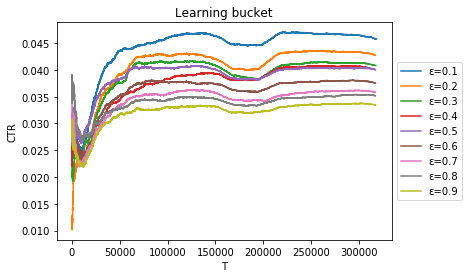

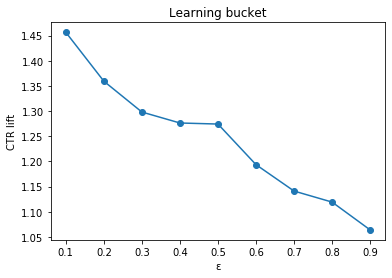

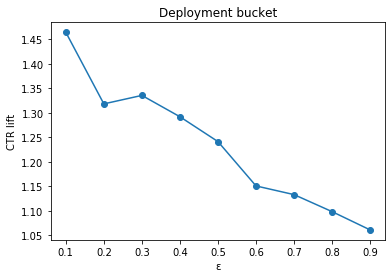

Best parameter: EpsilonGreedy (ε=0.1)
CPU times: user 5min 49s, sys: 8.08 s, total: 5min 57s
Wall time: 5min 54s


In [42]:
%%time
epsilon_values = np.arange(0.1,1,0.1)
tests = [EpsilonGreedy(round(e, 1), n_arms) for e in epsilon_values]
epsilongreedy_learn, epsilongreedy_deploy = plot_results(tests)

## EpsilonDecay

No handles with labels found to put in legend.


EpsilonDecay 0.0413 127.2


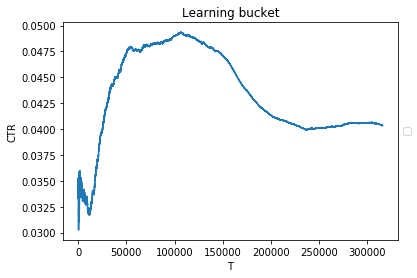

Learning bucket CTR list: [1.283252018035449]
Deployment bucket CTR list: [1.283252018035449]
Best parameter: EpsilonDecay
CPU times: user 2min 6s, sys: 4.16 s, total: 2min 10s
Wall time: 2min 7s


In [43]:
%%time
tests = [EpsilonDecay(n_arms)]
epsilondecay_learn, epsilondecay_deploy = plot_results(tests)

## AnnealingSoftmax

No handles with labels found to put in legend.


AnnealingSoftmax 0.034 737.8


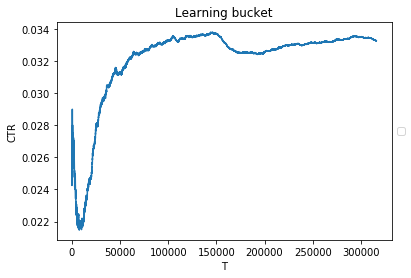

Learning bucket CTR list: [1.057918152316212]
Deployment bucket CTR list: [1.057918152316212]
Best parameter: AnnealingSoftmax
CPU times: user 12min 11s, sys: 15.4 s, total: 12min 27s
Wall time: 12min 17s


In [44]:
%%time
tests = [AnnealingSoftmax(n_arms)]
annealingsoftmax_learn, annealingsoftmax_deploy = plot_results(tests)

## UCB1

/Users/lixingxuan/Desktop/BT4014/Project/algo.py:149: RuntimeWarning: divide by zero encountered in true_divide
  np.sqrt(self.alpha * np.log(t + 1) / self.counts[pool_idx])


UCB1 (α=0.1) 0.0432 89.6
UCB1 (α=0.3) 0.0408 92.1
UCB1 (α=0.5) 0.0391 92.9
UCB1 (α=0.7) 0.0408 99.0
UCB1 (α=0.9) 0.0375 96.5
UCB1 (α=1.1) 0.0372 98.2
UCB1 (α=1.3) 0.0383 95.9


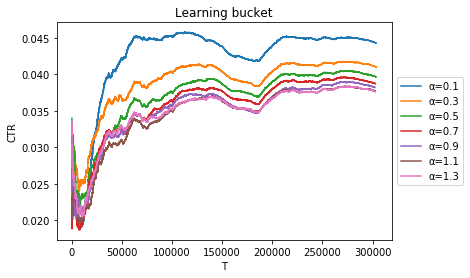

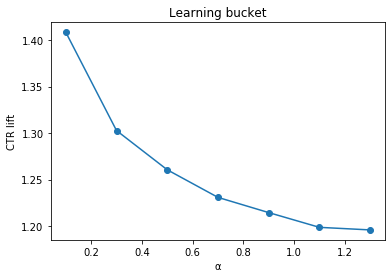

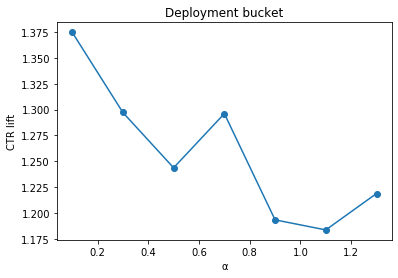

Best parameter: UCB1 (α=0.1)
CPU times: user 10min 59s, sys: 17.3 s, total: 11min 16s
Wall time: 11min 5s


In [48]:
%%time
# alpha_values = np.arange(0.1,1.4,0.2)
# tests = [UCB1(n_arms, round(a, 1)) for a in alpha_values]
tests = [UCB1(n_arms, 2)]
ucb1_learn, ucb1_deploy = plot_results(tests)

## BayesUCB

100%|██████████| 7388820/7388820 [7:30:16<00:00, 273.50it/s]   
No handles with labels found to put in legend.


Baysian UCB 0.0476 27016.2


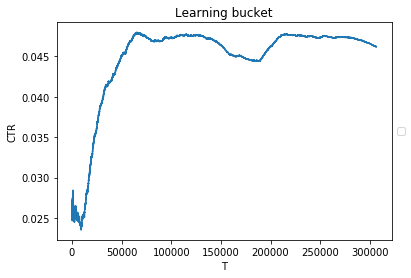

Learning bucket CTR list: [1.4694585632501953]
Deployment bucket CTR list: [1.4694585632501953]
Best parameter: Baysian UCB
CPU times: user 7h 9min 34s, sys: 1h 6min 13s, total: 8h 15min 48s
Wall time: 7h 30min 16s


In [57]:
%%time
tests = [BayesUCB(n_arms)]
bayesucb_learn, bayesucb_deploy = plot_results(tests)

## LinUCB

  0%|          | 443/7388820 [00:00<27:50, 4423.89it/s]

LinUCB (α=0.1) 0.0494 1515.8


  0%|          | 544/7388820 [00:00<22:40, 5430.77it/s]

LinUCB (α=0.3) 0.0476 1455.6


  0%|          | 558/7388820 [00:00<22:05, 5574.98it/s]

LinUCB (α=0.5) 0.0522 1371.2


  0%|          | 550/7388820 [00:00<22:23, 5497.89it/s]

LinUCB (α=0.7) 0.0477 1332.0


  0%|          | 533/7388820 [00:00<23:08, 5320.68it/s]

LinUCB (α=0.9) 0.0482 1337.7


  0%|          | 569/7388820 [00:00<21:40, 5681.36it/s]

LinUCB (α=1.1) 0.046 1327.6


100%|██████████| 7388820/7388820 [21:59<00:00, 5601.76it/s]


LinUCB (α=1.3) 0.0487 1319.0


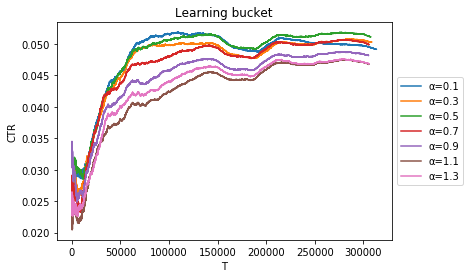

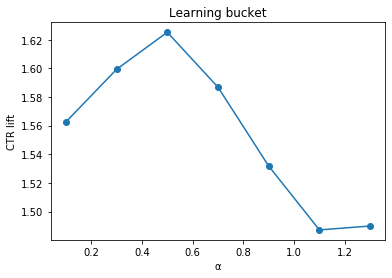

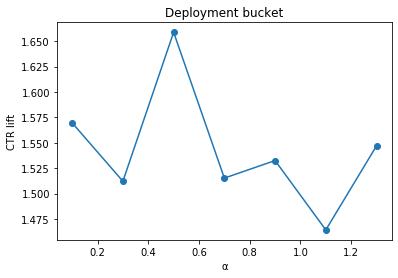

Best parameter: LinUCB (α=0.5)
CPU times: user 2h 39min 9s, sys: 1min 20s, total: 2h 40min 30s
Wall time: 2h 41min


In [72]:
%%time
alpha_values = np.arange(0.1,1.4,0.2)
tests = [LinUCB(n_arms, round(a, 1)) for a in alpha_values]
linucb_learn, linucb_deploy = plot_results(tests)

## Compare all models

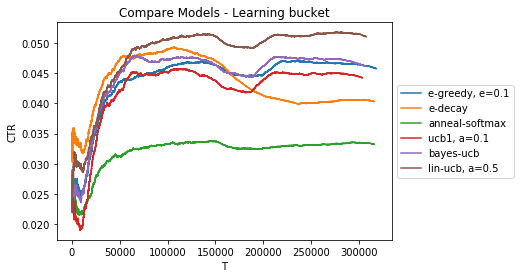

In [75]:
plt.plot(epsilongreedy_learn, label='e-greedy, e=0.1')
plt.plot(epsilondecay_learn, label='e-decay')
plt.plot(annealingsoftmax_learn, label='anneal-softmax')
plt.plot(ucb1_learn, label='ucb1, a=0.1')
plt.plot(bayesucb_learn, label='bayes-ucb')
plt.plot(linucb_learn, label='lin-ucb, a=0.5')

plt.title("Compare Models - Learning bucket")
plt.xlabel("T")
plt.ylabel("CTR")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

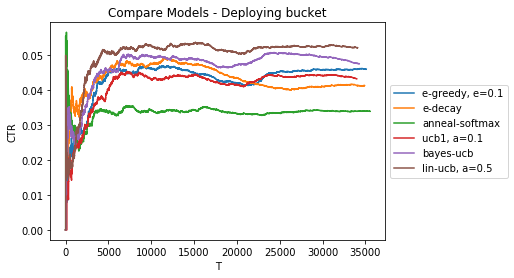

In [76]:
plt.plot(epsilongreedy_deploy, label='e-greedy, e=0.1')
plt.plot(epsilondecay_deploy, label='e-decay')
plt.plot(annealingsoftmax_deploy, label='anneal-softmax')
plt.plot(ucb1_deploy, label='ucb1, a=0.1')
plt.plot(bayesucb_deploy, label='bayes-ucb')
plt.plot(linucb_deploy, label='lin-ucb, a=0.5')

plt.title("Compare Models - Deploying bucket")
plt.xlabel("T")
plt.ylabel("CTR")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [77]:
for x in [epsilongreedy_learn, epsilondecay_learn, annealingsoftmax_learn,
         ucb1_learn, bayesucb_learn, linucb_learn]:
    print(round(x[-1]/rnd_learn[-1], 2))

1.46
1.29
1.06
1.41
1.48
1.63


In [78]:
for x in [epsilongreedy_deploy, epsilondecay_deploy, annealingsoftmax_deploy,
         ucb1_deploy, bayesucb_deploy, linucb_deploy]:
    print(round(x[-1]/rnd_deply[-1], 2))

1.39
1.25
1.03
1.31
1.44
1.58
